# Step 1: Installation and Setup

In [19]:
pip install tensorflow

In [20]:
import tensorflow as tf

In [21]:
print(tf.__version__)

2.14.0


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Importing dataset from kaggle to google colab

In [23]:
pip install kaggle

In [24]:
! mkdir -p ~/.kaggle

In [7]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [25]:
! cp kaggle.json ~/.kaggle

In [26]:
! chmod 600 /content/kaggle.json

In [27]:
! kaggle datasets list

ref                                                            title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                                DAIGT V2 Train Dataset                              29MB  2023-11-16 01:38:36            777         97  1.0              
carlmcbrideellis/llm-7-prompt-training-dataset                 LLM: 7 prompt training dataset                      41MB  2023-11-15 07:32:56           1237        102  1.0              
thedrcat/daigt-proper-train-dataset                            DAIGT Proper Train Dataset                         119MB  2023-11-05 14:03:25           1230        118  1.0              
muhammadbinimran/housing-price-prediction-data                 Housing

In [28]:
! kaggle datasets download -d mlg-ulb/creditcardfraud

 73% 48.0M/66.0M [00:00<00:00, 96.6MB/s]
100% 66.0M/66.0M [00:00<00:00, 127MB/s] 


In [29]:
# unzipping the dataset
! unzip -q /content/creditcardfraud.zip

In [30]:
dataset_1 = pd.read_csv('/content/creditcard.csv')

In [31]:
dataset_1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Step 3: Data Preprocessing

In [32]:
dataset_1.shape

(284807, 31)

In [34]:
print(f'Is there any null values : {dataset_1.isnull().values.any()}')
print(f'Number of null values {dataset_1.isnull().values.sum()}')

Is there any null values : False
Number of null values 0


In [35]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [38]:
dataset_1['Class'].value_counts() # dataset is highly unbalanced

0    284315
1       492
Name: Class, dtype: int64

In [41]:
# balance the dataset
fraud = dataset_1[dataset_1['Class']==1]
non_fraud = dataset_1[dataset_1['Class']==0]

In [42]:
fraud.shape, non_fraud.shape

((492, 31), (284315, 31))

In [43]:
# random selection of sample
non_fraud_t = non_fraud.sample(n = 492)

In [44]:
non_fraud_t.shape

(492, 31)

In [45]:
# merge the dataset
dataset = fraud.append(non_fraud_t, ignore_index = True)

<ipython-input-45-3c8527916a89>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = fraud.append(non_fraud_t, ignore_index = True)


In [46]:
dataset.shape

(984, 31)

In [47]:
print(dataset)

         Time        V1        V2        V3        V4        V5        V6  \
0       406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
1       472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
2      4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
3      6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
4      7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
..        ...       ...       ...       ...       ...       ...       ...   
979  155665.0  1.577366 -1.407304 -0.943101  0.728923 -0.600549  0.594561   
980   77676.0 -1.321596  1.233144  0.104309  1.168339  0.238925  0.148008   
981  139206.0  1.908653 -1.490634 -0.628877 -0.906115 -1.230329 -0.093766   
982  169601.0  2.102514  0.172956 -2.872379  0.143062  1.412925 -0.924336   
983   37030.0  0.981185 -0.830211  0.381679  0.919616 -1.065810 -0.302316   

           V7        V8        V9  ...       V21       V22       V23  \
0  

In [48]:
# observation in each class
dataset['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [49]:
# matrix of feature
x = dataset.drop(labels='Class', axis = 1)

In [50]:
# dependent variable
y = dataset['Class']

In [51]:
x.shape, y.shape

((984, 30), (984,))

In [52]:
# splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [53]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((787, 30), (197, 30), (787,), (197,))

In [54]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test =sc.transform(x_test)

In [55]:
x_train

array([[ 1.61429904,  0.77800874, -0.68696469, ..., -0.05438473,
        -0.22516748, -0.45381852],
       [-0.84198611,  0.50856591, -0.09787913, ...,  0.47212584,
         0.61394368, -0.45063389],
       [-0.8784038 ,  0.18941537,  0.09757787, ...,  0.31712745,
         0.4703467 , -0.44962821],
       ...,
       [-0.19798416,  0.2382928 , -0.36058863, ..., -0.49093328,
        -0.90603293,  0.58617443],
       [ 0.48214809,  0.8198767 , -0.550388  , ..., -0.11533308,
        -0.18664934, -0.44962821],
       [-0.71565325,  0.15713367, -0.14393156, ..., -1.0332909 ,
        -0.0948459 , -0.4210084 ]])

In [56]:
x_test

array([[-0.42250519,  0.67052603, -0.6631791 , ..., -0.02103993,
         0.02520953, -0.37173036],
       [ 1.12153111,  0.81425494, -0.50231816, ..., -0.16539143,
        -0.13360304, -0.44962821],
       [-1.59727347,  0.17447072,  0.66772974, ...,  2.0171849 ,
         1.547593  , -0.44962821],
       ...,
       [-1.53525664, -0.43811265,  1.94283383, ...,  1.6181271 ,
         1.57019099, -0.44962821],
       [-0.74554286,  0.63501466, -0.327163  , ..., -0.08307531,
         0.01252655, -0.42968234],
       [ 0.85086183,  0.82616848, -0.45340065, ..., -0.17089638,
        -0.11808213, -0.40357671]])

In [57]:
# converting to numpy array
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [58]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [59]:
# reshape the dataset
x_train = x_train.reshape(787, 30, 1)
x_test = x_test.reshape(197, 30, 1)

In [60]:
x_train.shape, x_test.shape

((787, 30, 1), (197, 30, 1))

# Step 4: Building the Model

In [61]:
# defining an object
model = tf.keras.models.Sequential()

In [63]:
# add first CNN layer
model.add(tf.keras.layers.Conv1D(filters = 32, kernel_size = 2, padding = 'same', activation = 'relu', input_shape = (30, 1)))

In [65]:
# batch normalization layer
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size = 2))

# add dropout layer
model.add(tf.keras.layers.Dropout(0.2))


In [66]:
# add second CNN layer
model.add(tf.keras.layers.Conv1D(filters = 32, kernel_size = 2, padding = 'same', activation = 'relu'))

# batch normalization layer
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size = 2))

# add dropout layer
model.add(tf.keras.layers.Dropout(0.3))


In [69]:
# add flatten layer
model.add(tf.keras.layers.Flatten())

In [70]:
# first dense layer
model.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))

# drop out layer
model.add(tf.keras.layers.Dropout(0.3))

In [71]:
# output layer
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [72]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 30, 32)            96        
                                                                 
 batch_normalization (Batch  (None, 30, 32)            128       
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 15, 32)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 32)            2080      
                                                                 
 batch_normalization_1 (Bat  (None, 15, 32)            1

In [73]:
# compile the model
opt = tf.keras.optimizers.Adam(learning_rate = 0.0001)

In [74]:
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics  = 'accuracy')

# Step 5: Training the model

In [75]:
history = model.fit(x_train, y_train, epochs = 25, validation_data = (x_test, y_test))

Epoch 1/25
25/25 [==============================] - 3s 19ms/step - loss: 0.7706 - accuracy: 0.5959 - val_loss: 0.6563 - val_accuracy: 0.7056
Epoch 2/25
25/25 [==============================] - 0s 7ms/step - loss: 0.6364 - accuracy: 0.6747 - val_loss: 0.6360 - val_accuracy: 0.7259
Epoch 3/25
25/25 [==============================] - 0s 11ms/step - loss: 0.5776 - accuracy: 0.7421 - val_loss: 0.6115 - val_accuracy: 0.7056
Epoch 4/25
25/25 [==============================] - 0s 10ms/step - loss: 0.5307 - accuracy: 0.7611 - val_loss: 0.5817 - val_accuracy: 0.6954
Epoch 5/25
25/25 [==============================] - 0s 12ms/step - loss: 0.4881 - accuracy: 0.7840 - val_loss: 0.5526 - val_accuracy: 0.7157
Epoch 6/25
25/25 [==============================] - 0s 12ms/step - loss: 0.4324 - accuracy: 0.8119 - val_loss: 0.5219 - val_accuracy: 0.7462
Epoch 7/25
25/25 [==============================] - 0s 7ms/step - loss: 0.4122 - accuracy: 0.8259 - val_loss: 0.4917 - val_accuracy: 0.7970
Epoch 8/25
25/2

In [77]:
# model prediction
y_pred = (model.predict(x_test) > 0.5).astype('int32')

7/7 [==============================] - 0s 3ms/step


In [78]:
print(y_pred[5], y_test[5])

[1] 1


In [80]:
for n in range(56, 60):
  print(y_pred[n], y_test[n])

[0] 0
[0] 0
[0] 1
[1] 1


In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[103   3]
 [ 14  77]]


In [82]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.9137055837563451


# Step 6: Learning Curve

In [83]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch + 1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc = 'upper left')
  plt.show()

  # training vs validation accuracy
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc = 'upper left')
  plt.show()


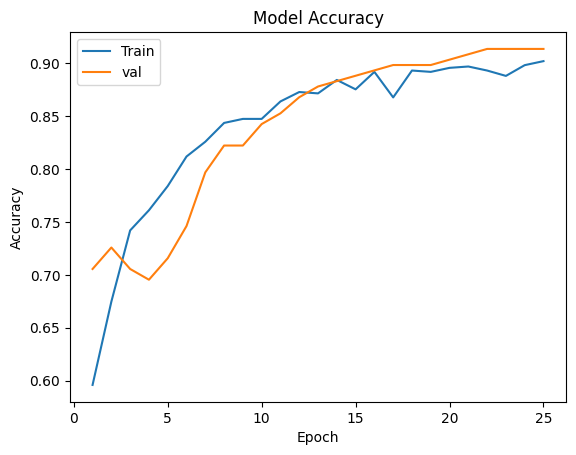

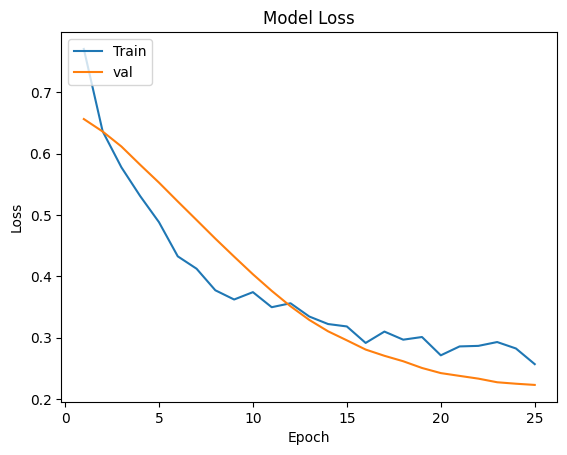

In [84]:
learning_curve(history, 25)